In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./test_50_no_emb.csv")

In [4]:
df.columns

Index(['text', 'source_id', 'step', 'sim'], dtype='object')

In [5]:
last_preds = df[df['step'] == 51]
last_preds['sim'].describe()

count    100.000000
mean       0.993625
std        0.007460
min        0.961547
25%        0.990788
50%        0.996243
75%        0.998384
max        0.999997
Name: sim, dtype: float64

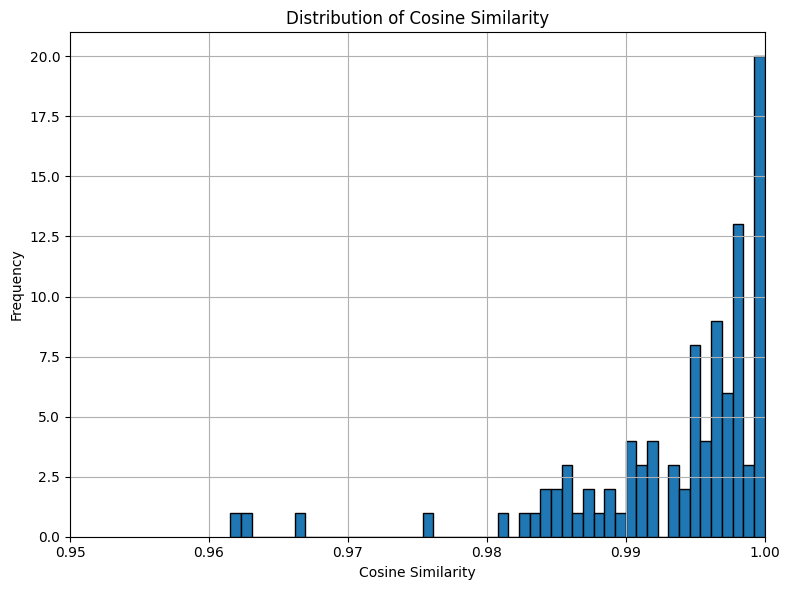

In [6]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the histogram
ax.hist(last_preds['sim'], bins=50, edgecolor='black')

# Set labels and title
ax.set_xlabel('Cosine Similarity')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Cosine Similarity')

# Adjust the x-axis limits to zoom in on the range of values
ax.set_xlim(0.95, 1.0)

# Add grid lines
ax.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

In [7]:
last_preds.sort_values('sim', ascending=False).to_csv("./last_preds_by_sim.csv")

## Cosine similarity trajectories

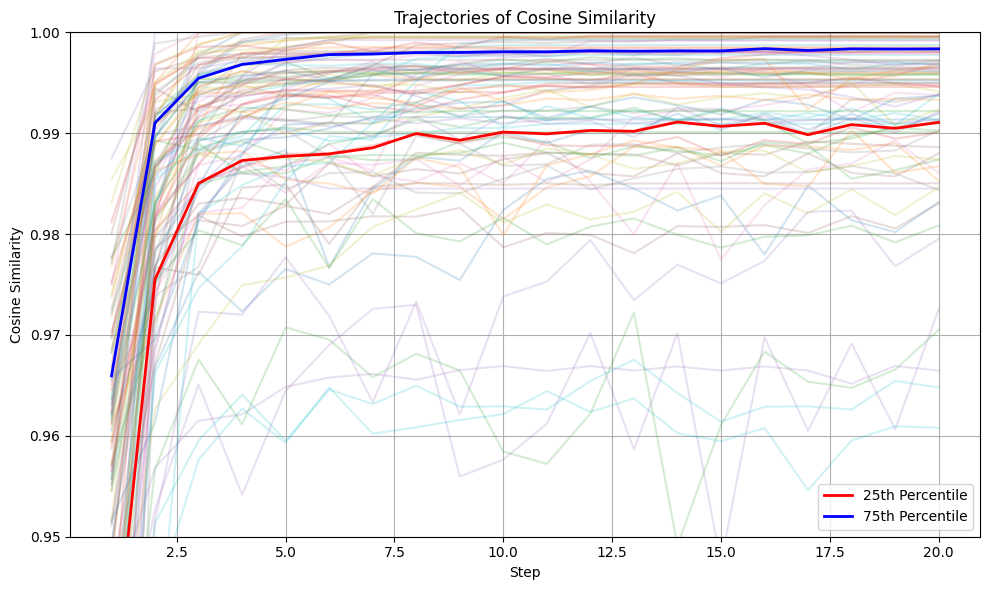

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot individual trajectories with increased transparency
for hash_id, group in df[(df["step"] > 0) & (df["step"] < 21)].groupby('source_id'):
    ax.plot(group['step'], group['sim'], alpha=0.2)

# Calculate and plot IQR lines
q25 = df[(df["step"] > 0) & (df["step"] < 21)].groupby('step')['sim'].quantile(0.25)
q75 = df[(df["step"] > 0) & (df["step"] < 21)].groupby('step')['sim'].quantile(0.75)
ax.plot(q25.index, q25.values, color='red', linewidth=2, label='25th Percentile')
ax.plot(q75.index, q75.values, color='blue', linewidth=2, label='75th Percentile')

ax.set_xlabel('Step')
ax.set_ylabel('Cosine Similarity')
ax.set_title('Trajectories of Cosine Similarity')
ax.set_ylim(0.95, 1.0)  # Set the y-axis range from 0.95 to 1.0
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()

In [15]:
# Calculate the improvement in similarity from step 10 to step 51
improvement_10_51 = df[df['step'] == 51]['sim'] - df[df['step'] == 10]['sim']

# Calculate the similarity at step 10
similarity_10 = df[df['step'] == 11]['sim']
similarity_50 = df[df['step'] == 51]['sim']

# Calculate statistics using describe()
improvement_stats = improvement_10_51.describe()
similarity_stats = similarity_10.describe()

# Print the results
print("Improvement from Step 10 to Step 51:")
print(improvement_stats)

print("\nSimilarity at Step 10:")
print(similarity_stats)

print("\nSimilarity at Step 50:")
print(similarity_50.describe())

Improvement from Step 10 to Step 51:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: sim, dtype: float64

Similarity at Step 10:
count    100.000000
mean       0.992644
std        0.008772
min        0.957224
25%        0.989934
50%        0.995712
75%        0.998063
max        0.999997
Name: sim, dtype: float64

Similarity at Step 50:
count    100.000000
mean       0.993625
std        0.007460
min        0.961547
25%        0.990788
50%        0.996243
75%        0.998384
max        0.999997
Name: sim, dtype: float64


## BLEU

In [16]:
from nltk.translate.bleu_score import sentence_bleu

# Create a new column 'ground_truth' with the step 0 text for each source_id
ground_truth = df[df['step'] == 0][['source_id', 'text']].set_index('source_id')['text'].to_dict()
df['ground_truth'] = df['source_id'].map(ground_truth)

# Calculate BLEU score for each row using the 'ground_truth' and 'text' columns
df['bleu_score'] = df.apply(lambda row: sentence_bleu([row['ground_truth'].split()], row['text'].split()), axis=1)

/home/ritsuko/ai/nlp/vec2text/.venv/lib/python3.10/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/ritsuko/ai/nlp/vec2text/.venv/lib/python3.10/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/ritsuko/ai/nlp/vec2text/.venv/lib/python3.10/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Con

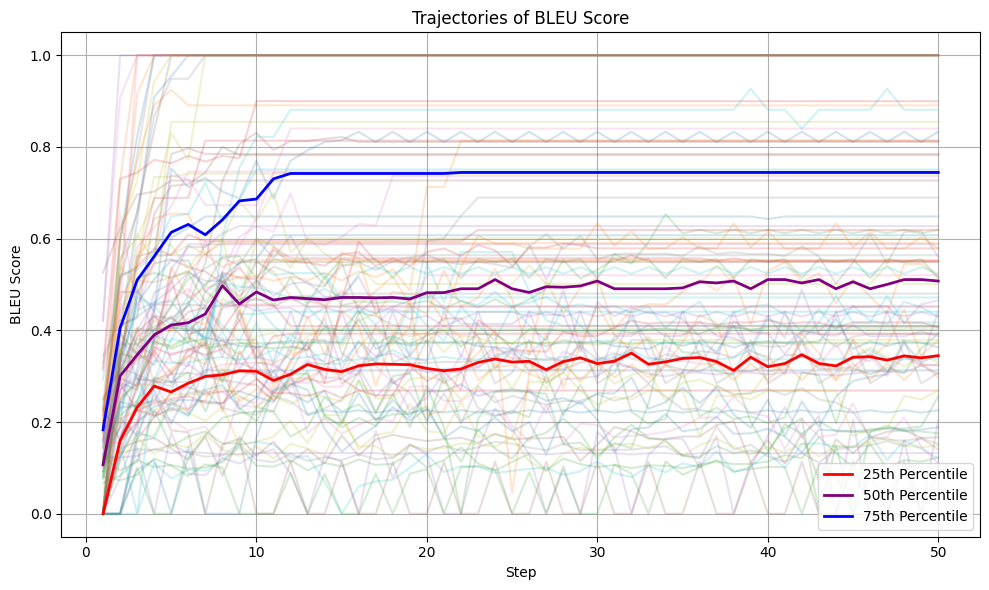

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot individual trajectories with increased transparency
for hash_id, group in df[(df["step"] > 0) & (df["step"] < 51)].groupby('source_id'):
    ax.plot(group['step'], group['bleu_score'], alpha=0.2)

# Calculate and plot IQR lines
q25 = df[(df["step"] > 0) & (df["step"] < 51)].groupby('step')['bleu_score'].quantile(0.25)
q50 = df[(df["step"] > 0) & (df["step"] < 51)].groupby('step')['bleu_score'].quantile(0.50)
q75 = df[(df["step"] > 0) & (df["step"] < 51)].groupby('step')['bleu_score'].quantile(0.75)
ax.plot(q25.index, q25.values, color='red', linewidth=2, label='25th Percentile')
ax.plot(q50.index, q50.values, color='purple', linewidth=2, label='50th Percentile')
ax.plot(q75.index, q75.values, color='blue', linewidth=2, label='75th Percentile')

ax.set_xlabel('Step')
ax.set_ylabel('BLEU Score')
ax.set_title('Trajectories of BLEU Score')
#ax.set_ylim(0.95, 1.0)  # Set the y-axis range from 0.95 to 1.0
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()

In [27]:
df[df["step"] == 51].sort_values("sim").to_csv("last_preds_bleu.csv")

In [25]:
df[df["step"] == 51]["bleu_score"].describe()

count    100.000000
mean       0.535311
std        0.266901
min        0.094198
25%        0.341793
50%        0.490754
75%        0.744420
max        1.000000
Name: bleu_score, dtype: float64